In [1]:
# import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 8)

In [20]:
# data needs to be inputted
data_in = pd.read_csv('koyfin_VGT_holdings.csv')
risky_assets = data_in[:-2]['Ticker'].tolist()

In [21]:
# data parameters
n_monto_carlo = 10 ** 5
start_date = '2018-01-01'
end_date = '2024-01-01'
n_assets = len(risky_assets)

In [22]:
# download the data
prices_df = yf.download(risky_assets, start=start_date, end=end_date)
print(f'Downloaded {prices_df.shape[0]} rows of data.')
N_DAYS = prices_df.shape[0]
prices_df.head(3)

[*********************100%%**********************]  313 of 313 completed


Downloaded 1509 rows of data.


Price       Adj Close                                                          \
Ticker           AAPL       ACIW       ACLS      ACMR         ACN        ADBE   
Date                                                                            
2018-01-02  40.615887  22.690001  29.549999  1.873333  139.834610  177.699997   
2018-01-03  40.608814  22.510000  29.900000  1.766667  140.479965  181.039993   
2018-01-04  40.797443  22.730000  30.200001  1.771667  142.143372  183.220001   

Price                                                   ... Volume       \
Ticker          ADEA        ADI        ADSK       ADTN  ...   WULF XPER   
Date                                                    ...               
2018-01-02  7.583090  79.776611  107.120003  17.241043  ...   6500  NaN   
2018-01-03  7.598470  80.766327  109.379997  16.637598  ...  13200  NaN   
2018-01-04  7.521562  80.677948  112.070000  16.594500  ...   3100  NaN   

Price                                                     
Ticker          XRX    YEXT YOU    ZBRA ZETA  ZM  ZS ZUO  
Date                                                      
2018-01-02  1776800  484100 NaN  310600  NaN NaN NaN NaN  
2018-01-03  1907500  499000 NaN  253000  NaN NaN NaN NaN  
2018-01-04  2565900  444800 NaN  435200  NaN NaN NaN NaN  

[3 rows x 1878 columns]

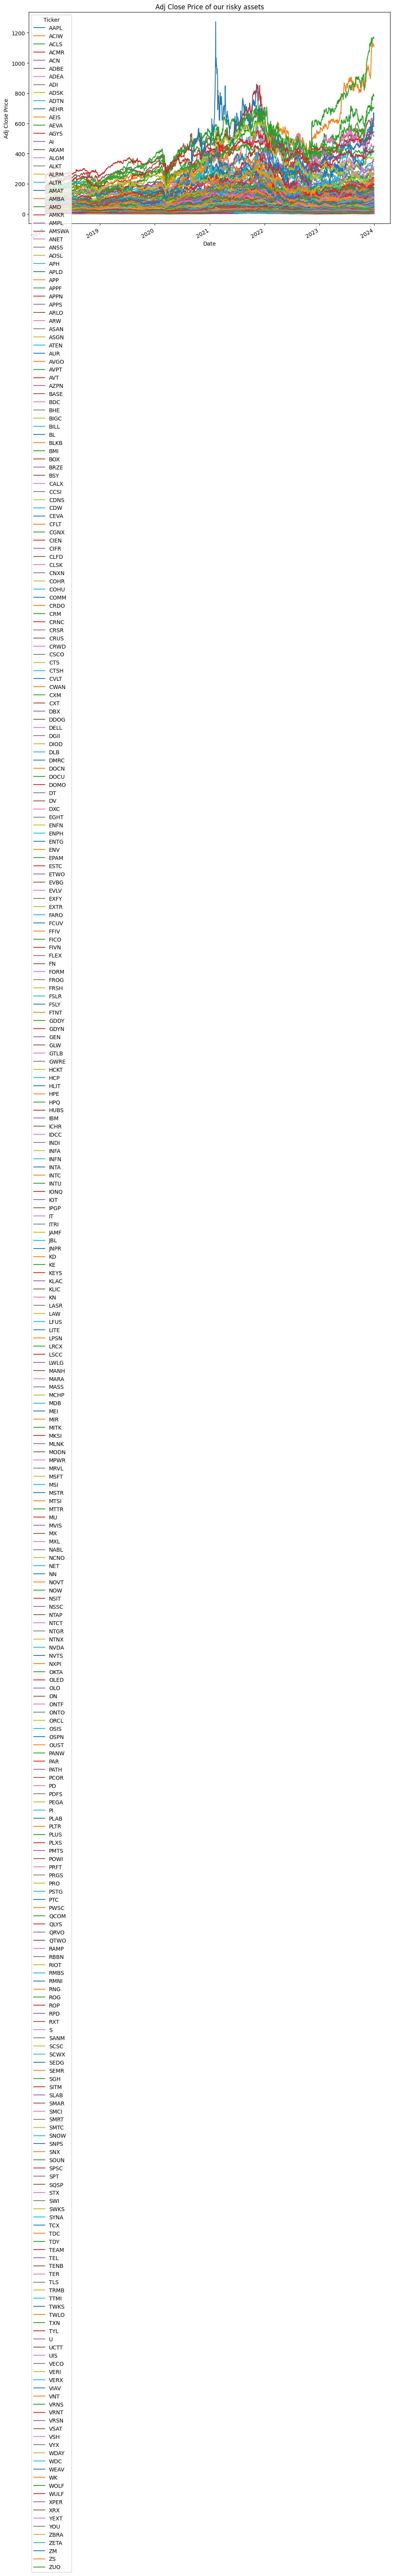

In [23]:
# choose Adj Close
prices_df['Adj Close'].plot(title='Adj Close Price of our risky assets')
plt.ylabel('Adj Close Price')
plt.show()

In [24]:
# caculate the percentage returns
returns_df = prices_df['Adj Close'].pct_change().dropna()
returns_df.head()

Ticker,AAPL,ACIW,ACLS,ACMR,ACN,ADBE,ADEA,ADI,ADSK,ADTN,...,WULF,XPER,XRX,YEXT,YOU,ZBRA,ZETA,ZM,ZS,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-21,-0.020268,-0.012880,-0.003913,-0.015293,-0.017836,-0.016354,-0.012726,-0.008947,-0.013079,0.010736,...,0.074074,0.0,-0.050680,-0.012739,0.009144,-0.001995,0.015674,-0.014918,-0.004633,0.026810
2022-09-22,-0.006375,-0.026095,-0.043044,-0.045240,-0.011680,0.002655,-0.011533,-0.020884,-0.027388,-0.008497,...,-0.034483,0.0,-0.013021,-0.034409,-0.018122,-0.042584,-0.049383,-0.018436,-0.054224,-0.024804
2022-09-23,-0.015124,-0.005742,-0.019326,-0.024753,-0.008920,-0.008709,-0.014413,-0.023531,-0.013839,-0.029995,...,-0.008929,0.0,-0.054749,-0.006681,-0.034815,-0.017953,-0.012987,-0.001207,-0.023807,-0.017403
2022-09-26,0.002260,-0.016362,0.004011,-0.148658,-0.009385,-0.026708,-0.006268,-0.007751,-0.003088,0.049144,...,-0.054054,0.0,-0.034194,0.002242,-0.023468,-0.008133,0.013158,-0.015044,0.006743,-0.029973
2022-09-27,0.006566,0.002935,0.036477,0.068143,-0.004660,0.002203,-0.006307,0.007030,0.021577,-0.001579,...,0.066667,0.0,0.011561,0.004474,0.030263,-0.003423,0.038961,0.012682,0.021595,0.012640


# 平均回报率和协方差矩阵

In [25]:
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS
avg_returns, cov_mat

(Ticker
 AAPL    1.196480
 ACIW    2.103284
 ACLS    4.184335
 ACMR    3.486991
 ACN     1.520175
           ...   
 ZBRA    0.389426
 ZETA    2.340620
 ZM      0.181735
 ZS      2.076003
 ZUO     1.980250
 Length: 313, dtype: float64,
 Ticker      AAPL      ACIW      ACLS      ACMR       ACN      ADBE      ADEA  \
 Ticker                                                                         
 AAPL    0.403828  0.214128  0.361996  0.408671  0.243147  0.320936  0.123525   
 ACIW    0.214128  0.993605  0.340268  0.557988  0.244442  0.300336  0.329198   
 ACLS    0.361996  0.340268  1.328949  1.308000  0.353298  0.452640  0.400449   
 ACMR    0.408671  0.557988  1.308000  4.515652  0.505997  0.696065  0.556026   
 ACN     0.243147  0.244442  0.353298  0.505997  0.395872  0.317306  0.200257   
 ...          ...       ...       ...       ...       ...       ...       ...   
 ZBRA    0.319723  0.366390  0.555390  0.724144  0.311887  0.339246  0.286033   
 ZETA    0.242777  0.406466  0.4440

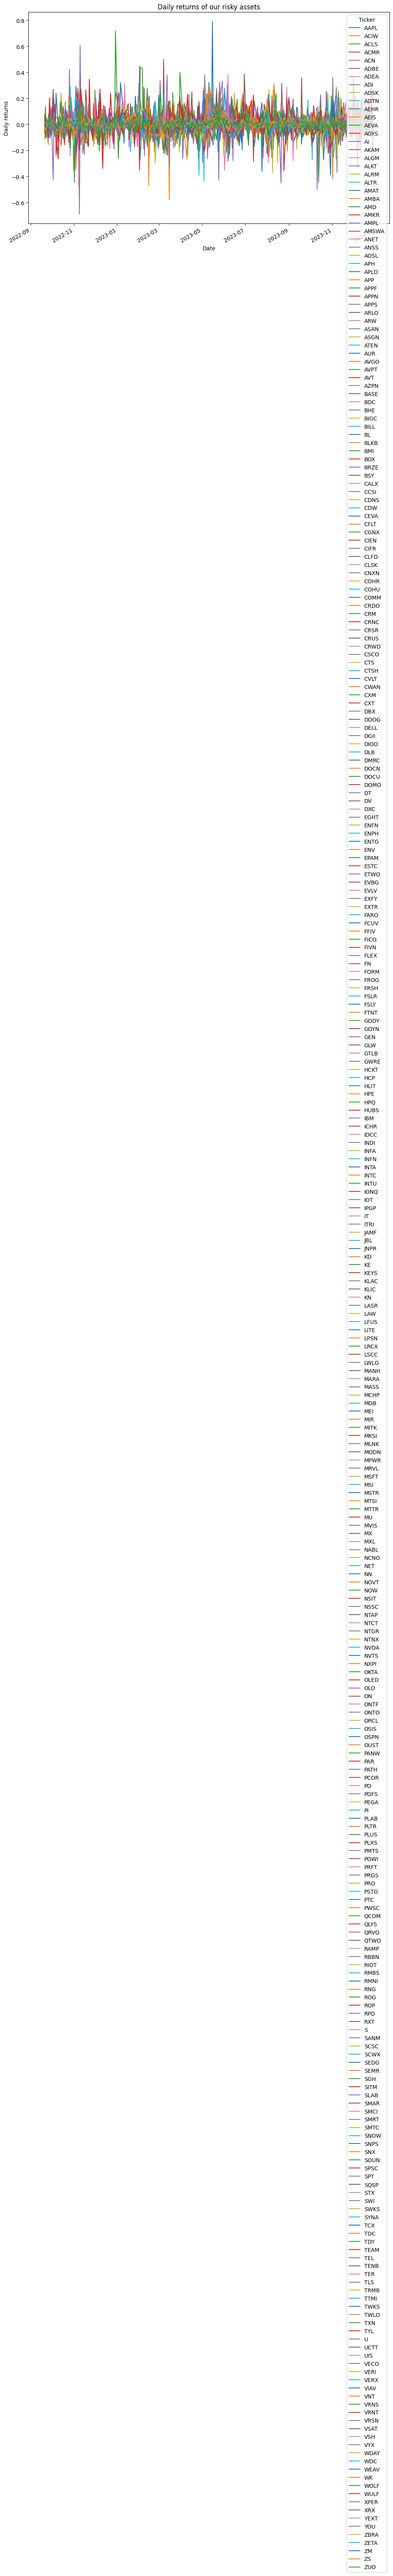

In [26]:
returns_df.plot(title='Daily returns of our risky assets')
plt.ylabel('Daily returns')
plt.show()

In [28]:
np.random.seed(666)
weights = np.random.random(size=(n_monto_carlo, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [29]:
portf_rtns = weights @ avg_returns

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(weights[i] @ cov_mat @ weights[i].T))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [30]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol, 'sharpe_ratio': portf_sharpe_ratio})

In [31]:
n_internal = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), portf_results_df.returns.max(), n_internal)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for index in range(n_internal):
    if portf_rtns_ef[index] not in portf_rtns:
        indices_to_skip.append(index)
        continue
    matched_index = np.where(portf_rtns == portf_rtns_ef[index])
    portf_vol_ef.append(np.min(portf_vol[matched_index]))


# delete the inner dot
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

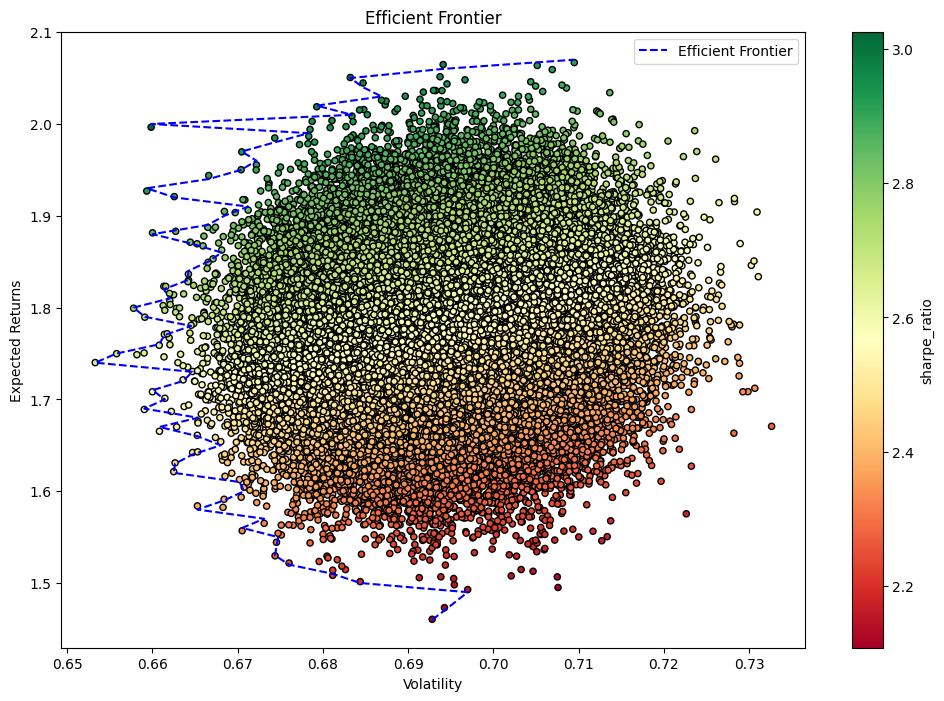

In [49]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio',\
                      cmap='RdYlGn', edgecolors='black', ax=ax)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--', label='Efficient Frontier')
ax.legend()
plt.show()

In [36]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [39]:
print('Maximum Sharpe Ratio portfolio --->')
print('Performance:')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights:')
for x, y in zip(risky_assets, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio --->
Performance:
returns: 199.65% volatility: 65.98% sharpe_ratio: 302.57% 
Weights:
MSFT: 0.63% AAPL: 0.36% NVDA: 0.11% AVGO: 0.14% CRM: 0.39% AMD: 0.26% ADBE: 0.65% CSCO: 0.50% ACN: 0.17% ORCL: 0.11% QCOM: 0.55% INTU: 0.65% AMAT: 0.12% TXN: 0.40% IBM: 0.02% NOW: 0.58% INTC: 0.55% MU: 0.59% LRCX: 0.41% ADI: 0.11% KLAC: 0.63% PANW: 0.47% SNPS: 0.64% CDNS: 0.13% APH: 0.23% ANET: 0.46% NXPI: 0.67% CRWD: 0.42% MRVL: 0.18% MSI: 0.36% ROP: 0.57% WDAY: 0.63% MCHP: 0.66% SMCI: 0.22% ADSK: 0.17% SNOW: 0.06% TEL: 0.67% FTNT: 0.13% PLTR: 0.59% DDOG: 0.33% DELL: 0.57% CTSH: 0.56% CDW: 0.55% MPWR: 0.16% IT: 0.66% ON: 0.60% HUBS: 0.13% ANSS: 0.23% FICO: 0.51% GLW: 0.25% MDB: 0.03% HPQ: 0.02% TEAM: 0.65% NET: 0.16% KEYS: 0.05% WDC: 0.27% HPE: 0.65% NTAP: 0.37% PTC: 0.17% ENTG: 0.62% TYL: 0.12% TER: 0.39% FSLR: 0.14% TDY: 0.05% SWKS: 0.46% STX: 0.02% ZBRA: 0.34% MSTR: 0.36% GDDY: 0.09% ZS: 0.20% NTNX: 0.39% AKAM: 0.32% ZM: 0.52% TRMB: 0.64% VRSN: 0.21% PSTG: 0.19% ENPH

In [45]:
data_in[['Ticker', 'Weight']].head(9)

,Ticker,Weight
0,MSFT,0.1735
1,AAPL,0.1533
2,NVDA,0.1194
3,AVGO,0.0441
4,CRM,0.0200
5,AMD,0.0196
6,ADBE,0.0161
7,CSCO,0.0147
8,ACN,0.0145


In [46]:
print('Minimum Volatility portfolio --->')
print('Performance:')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights:')
for x, y in zip(risky_assets, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio --->
Performance:
returns: 174.01% volatility: 65.33% sharpe_ratio: 266.36% 
Weights:
MSFT: 0.22% AAPL: 0.14% NVDA: 0.33% AVGO: 0.26% CRM: 0.13% AMD: 0.63% ADBE: 0.36% CSCO: 0.55% ACN: 0.02% ORCL: 0.09% QCOM: 0.29% INTU: 0.62% AMAT: 0.04% TXN: 0.23% IBM: 0.45% NOW: 0.36% INTC: 0.35% MU: 0.45% LRCX: 0.19% ADI: 0.40% KLAC: 0.23% PANW: 0.01% SNPS: 0.38% CDNS: 0.38% APH: 0.03% ANET: 0.29% NXPI: 0.30% CRWD: 0.61% MRVL: 0.28% MSI: 0.47% ROP: 0.11% WDAY: 0.20% MCHP: 0.22% SMCI: 0.24% ADSK: 0.23% SNOW: 0.33% TEL: 0.45% FTNT: 0.11% PLTR: 0.19% DDOG: 0.63% DELL: 0.14% CTSH: 0.27% CDW: 0.27% MPWR: 0.19% IT: 0.37% ON: 0.56% HUBS: 0.06% ANSS: 0.24% FICO: 0.17% GLW: 0.10% MDB: 0.11% HPQ: 0.28% TEAM: 0.52% NET: 0.26% KEYS: 0.01% WDC: 0.21% HPE: 0.51% NTAP: 0.36% PTC: 0.40% ENTG: 0.57% TYL: 0.51% TER: 0.32% FSLR: 0.48% TDY: 0.45% SWKS: 0.02% STX: 0.58% ZBRA: 0.03% MSTR: 0.66% GDDY: 0.06% ZS: 0.61% NTNX: 0.06% AKAM: 0.21% ZM: 0.24% TRMB: 0.05% VRSN: 0.42% PSTG: 0.66% ENPH: 

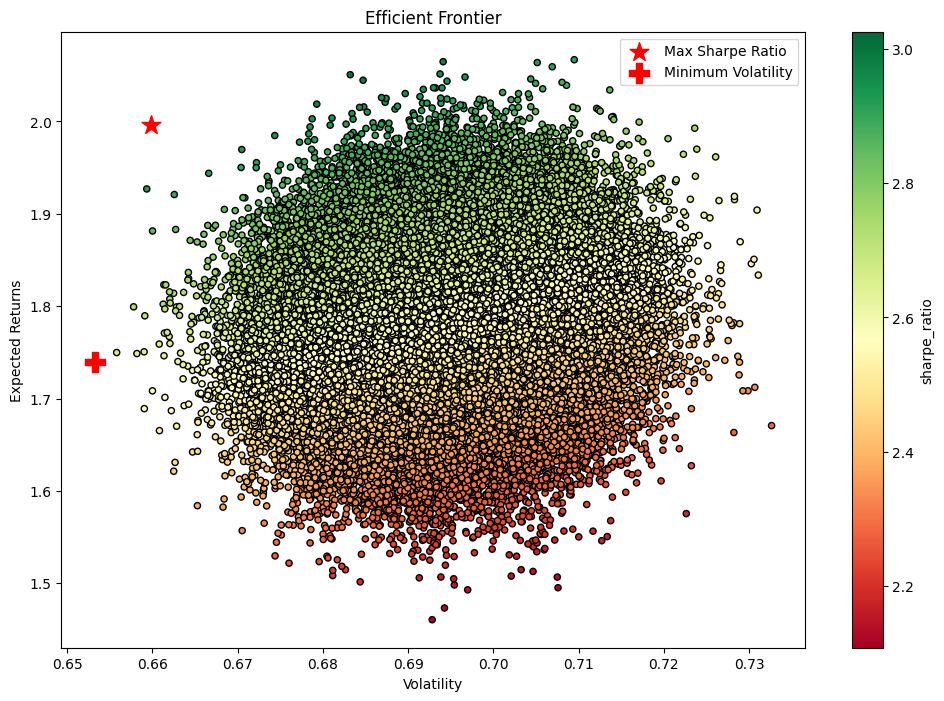

In [47]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, y=max_sharpe_portf.returns, 
           c='red', marker='*', s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, y=min_vol_portf.returns, 
           c='red', marker='P', s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.legend()
plt.show()